In [1]:
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import fastmri
from fastmri.data import transforms as T

/home/yusuf/miniconda3/envs/fastmri_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def dataset_info(dpath):
    file_names = []
    num_slices = []
    num_coils = []
    heights = []
    widths = []
    mr_type=[]

    dlist = [f for f in os.listdir(dpath) if f.endswith('.h5')]

    for file in dlist:
        file_path = os.path.join(dpath, file)
        with h5py.File(file_path, 'r') as hf:

            volume_kspace_shape = hf['kspace'].shape
            slices, coils, height, width = volume_kspace_shape
            mr = file.split("_")[2]

            file_names.append(file)
            num_slices.append(slices)
            num_coils.append(coils)
            heights.append(height)
            widths.append(width)
            mr_type.append(mr)

    df = pd.DataFrame({
        'file_name': file_names,
        'num_slices': num_slices,
        'num_coils': num_coils,
        'height': heights,
        'width': widths,
        'mr_type': mr_type
    })
    return df

In [42]:
data_path = "/home/yusuf/Desktop/projects/data/fastmri/multicoil_train"
df = dataset_info(data_path)

In [43]:
df

,file_name,num_slices,num_coils,height,width,mr_type
0,file_brain_AXT2_201_2010222.h5,16,20,768,396,AXT2
1,file_brain_AXT1POST_207_2070717.h5,16,4,640,322,AXT1POST
2,file_brain_AXT1PRE_209_6001257.h5,16,14,640,320,AXT1PRE
3,file_brain_AXT2_200_2000518.h5,16,16,768,396,AXT2
4,file_brain_AXT2_200_2000193.h5,16,20,768,396,AXT2
...,...,...,...,...,...,...
2233,file_brain_AXT1PRE_210_6001753.h5,16,8,640,320,AXT1PRE
2234,file_brain_AXT2_210_6001709.h5,16,16,768,396,AXT2
2235,file_brain_AXT1POST_207_2070251.h5,16,4,640,322,AXT1POST
2236,file_brain_AXT2_207_2070546.h5,16,4,640,320,AXT2


In [44]:
df.mr_type.value_counts()

AXT2        1331
AXT1POST     482
AXFLAIR      163
AXT1PRE      141
AXT1         121
Name: mr_type, dtype: int64

In [45]:
t1post_df = df[df.mr_type=="AXT1POST"]
t1post_df = t1post_df[t1post_df.width>=320]
t1post_data_list = t1post_df.file_name.to_list()
flair_df = df[(df.mr_type=="AXT1") | (df.mr_type=="AXFLAIR")]
flair_df = flair_df[flair_df.width>=320]
flair_data_list = flair_df.file_name.to_list()
print(len(t1post_data_list),len(flair_data_list))

472 200


In [49]:
flair_df =  df[df.mr_type=="AXFLAIR"]
flair_df = flair_df[flair_df.width>=320]
flair_data_list = flair_df.file_name.to_list()

t2df = df[df.mr_type=="AXT2"]
t2df = t2df[t2df.width>=320]
t2_data_list = t2df.file_name.to_list()[:100]

t2_flair_data_list = flair_data_list+t2_data_list
len(t2_flair_data_list)

200

In [50]:
t2flair_df = df[df['file_name'].isin(t2_flair_data_list)]
t2flair_df.to_csv('train_files_AXT2+FLAIR.csv', index=False)

In [46]:
flair_df = flair_df[flair_df.height!=512]
flair_data_list = flair_df.file_name.to_list()
flair_df.to_csv("train_files_AXT1+FLAIR.csv")
len(flair_data_list)

198

In [53]:
t2flair_df.width.value_counts()

320    136
396     62
392      2
Name: width, dtype: int64

In [18]:
t1post_df.to_csv("train_files_AXT1POST.csv")
flair_df.to_csv("train_files_AXT1+FLAIR.csv")


In [55]:
test_data_path = "/home/yusuf/Desktop/projects/data/fastmri/multicoil_val"
testdf = dataset_info(test_data_path)
testdf

,file_name,num_slices,num_coils,height,width,mr_type
0,file_brain_AXT1POST_208_2080278.h5,16,4,640,322,AXT1POST
1,file_brain_AXT1POST_203_6000747.h5,16,4,640,320,AXT1POST
2,file_brain_AXT1_202_2020038.h5,16,12,640,320,AXT1
3,file_brain_AXT2_202_2020449.h5,16,16,640,320,AXT2
4,file_brain_AXT2_207_2070024.h5,16,4,640,320,AXT2
...,...,...,...,...,...,...
454,file_brain_AXT1POST_200_6002353.h5,16,16,640,320,AXT1POST
455,file_brain_AXT2_209_2090346.h5,16,14,768,396,AXT2
456,file_brain_AXT1POST_202_6000426.h5,16,16,640,320,AXT1POST
457,file_brain_AXT2_202_2020244.h5,16,12,640,320,AXT2


In [78]:
testdf.mr_type.value_counts()

AXT2        266
AXT1POST     99
AXFLAIR      33
AXT1         32
AXT1PRE      29
Name: mr_type, dtype: int64

In [60]:
t1post_df = testdf[testdf.mr_type=="AXT1POST"]
t1post_df = t1post_df[t1post_df.width>=320]
t1post_data_list = t1post_df.file_name.to_list()
len(t1post_data_list)

flair_df.to_csv("test_file_lists/test_filesAXT1POST.csv")

In [79]:
t1post_df = testdf[testdf.mr_type=="AXFLAIR"]
t1post_df = t1post_df[t1post_df.width>=320]
t1post_data_list = t1post_df.file_name.to_list()
print(len(t1post_data_list))

flair_df.to_csv("test_file_lists/test_filesAXFLAIR.csv")

27


In [75]:
samppath = "/home/yusuf/Desktop/projects/scripts/reconstructions/fold=4_chans=64/slice_0_0.h5"
with h5py.File(samppath, "r") as hf:
    volume = hf['reconstruction'][()]

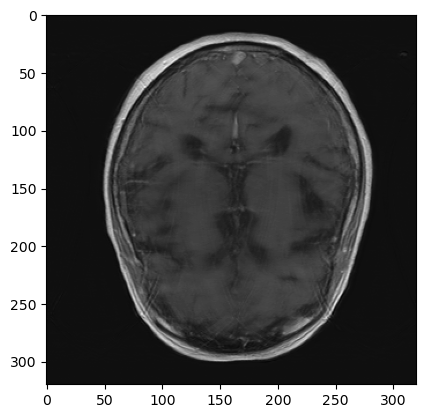

In [76]:
plt.imshow(volume[0],cmap='gray')

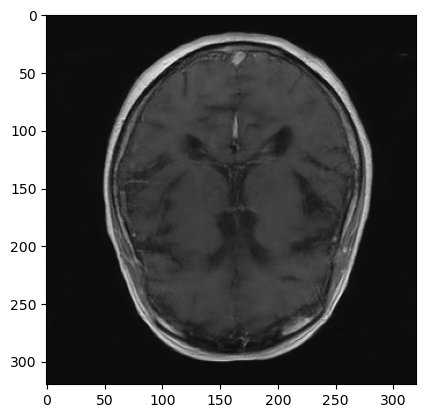

In [77]:
yopath = "/home/yusuf/Desktop/projects/scripts/reconstructions/fold4/slice_0_0.h5"
with h5py.File(yopath, "r") as hf:
    samp = hf['reconstruction'][()]

plt.imshow(samp[0],cmap='gray')

In [22]:
t1post_df.height.value_counts()

640    472
Name: height, dtype: int64

In [11]:
testdata_path = "/home/yusuf/Desktop/projects/data/fastmri/multicoil_test"
test_df = dataset_info(testdata_path)
test_df

,file_name,num_slices,num_coils,height,width,mr_type
0,file_brain_AXFLAIR_210_6001880.h5,16,20,640,320,AXFLAIR
1,file_brain_AXT2_208_2080123.h5,16,4,640,320,AXT2
2,file_brain_AXT1PRE_201_6002726.h5,16,16,640,320,AXT1PRE
3,file_brain_AXT2_202_2020375.h5,14,20,640,320,AXT2
4,file_brain_AXT2_201_2010395.h5,16,16,768,396,AXT2
...,...,...,...,...,...,...
181,file_brain_AXFLAIR_200_6002635.h5,16,16,640,320,AXFLAIR
182,file_brain_AXT1POST_208_2080056.h5,16,6,640,322,AXT1POST
183,file_brain_AXT2_200_6002031.h5,16,16,768,396,AXT2
184,file_brain_AXT1_206_2120004.h5,16,20,640,320,AXT1


In [13]:
test_df.mr_type.value_counts()

AXT2        106
AXT1POST     39
AXFLAIR      17
AXT1PRE      14
AXT1         10
Name: mr_type, dtype: int64

In [8]:
def kspace2rss(h5path,slice_idx):
    
    hf = h5py.File(h5path)
    volume_kspace = hf['kspace'][()]
    slice_kspace = volume_kspace[slice_idx]
    slice_kspace2 = T.to_tensor(slice_kspace)
    slice_image = fastmri.ifft2c(slice_kspace2)
    slice_image_abs = fastmri.complex_abs(slice_image) 
    slice_image_rss = fastmri.rss(slice_image_abs, dim=0)

    return slice_image_rss

In [9]:
data_list = sorted(os.listdir(data_path))
file_name = f'{data_path}/{t1post_data_list[32]}'

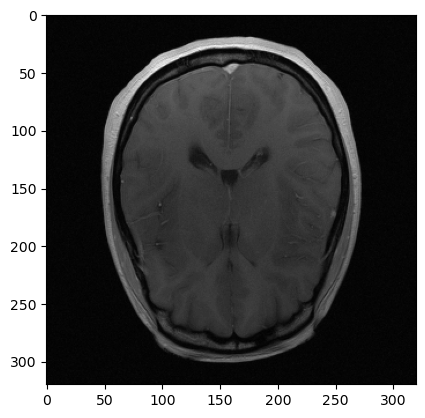

In [10]:
sample_img=kspace2rss(file_name,0)
plt.imshow(sample_img[160:480,:],cmap='gray')

In [20]:
hf = h5py.File(file_name)
volume_kspace = hf['kspace'][()]
slice_kspace = volume_kspace[0]
slice_kspace2 = T.to_tensor(slice_kspace)

In [21]:
from fastmri.data.subsample import create_mask_for_mask_type 

mask = create_mask_for_mask_type(mask_type_str="random",center_fractions=[0.08],accelerations=[4])
masked_kspace, mask, _ = T.apply_mask(slice_kspace2, mask)